In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
plt.style.use("dark_background")

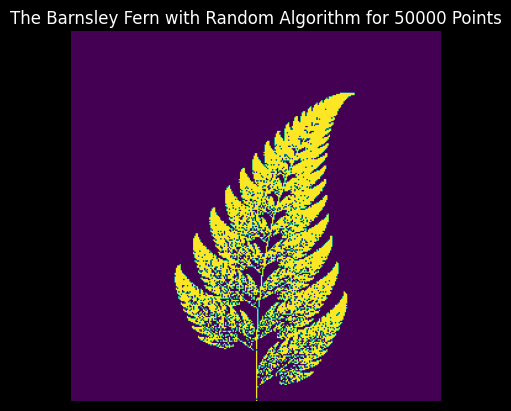

In [2]:
"""
Adapted from scipython.com chapter 7
https://scipython.com/book/chapter-7-matplotlib/examples/the-barnsley-fern/
The Barnsley Fern is a fractal which resembles the Black Spleenwort species of fern.
It is constructed by plotting a sequence of points in the (x,y) plane, starting at (0,0),
generated by the following affine transformations f1, f2, f3, and f4 where each transformation is applied to the
previous point and chosen at random with probabilities p1=0.01, p2=0.85, p3=0.07 and p4=0.07. 
"""

def f1(x, y):
    # Scales the point and moves it up and to the right.
    return (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6)


def f2(x, y):
    # Scales and rotates to the left.
    return (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)


def f3(x, y):
    # Scales, mirrors, rotates and moves to the right.
    return (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)


def f4(x, y):
    # Creates the small line representing the stem of the leaves.
    return (0, 0.16*y)


# Defining a first point. Data generation will start with this point.
unit = 0
(x,y) = (unit,unit)
# The number of all points to be generated
num_points = 50_000

# Initiating the plot
fig, ax = plt.subplots()
width, height = 300, 300
# ax.set_xlim(50, 500)
ax.set_aspect("equal")
pixels = np.zeros((width, height))

for i in range(num_points):
    # Choose one of the linear transformations in a weighted random fashion
    # and apply it to the first point (unit, unit).
    f = np.random.choice([f1, f2, f3, f4], p=[0.85, 0.07, 0.07, 0.01])
    (x,y) = f(x,y)
    # Applying the transformations will yield x's and y's in intervals (-2.2,2.7) and [0, 10) respectively.
    # We will now have to map these (x,y) pairs to coordinate pixels on the plot:
    imagex = int(width/2 + x*width/10)
    imagey = int(y*height/12)
    # This point is on the fern leaf, so its value has to change in the pixels array,
    # so that its color will change on the image:
    pixels[imagey, imagex] = 1




ax.imshow(pixels[:,:])
ax.invert_yaxis();
ax.set_axis_off()
ax.set_title("The Barnsley Fern with Random Algorithm for 50000 Points");

In [3]:
fig.savefig("BarnselyRandom.jpg")